In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("vss_xyz_dia_2017-2019",index_col=0)
df.DATE = pd.to_datetime(df.DATE)
df.set_index('DATE',inplace=True)
df.head()

,TIME,DOY,VSSX,VSSY,VSSZ,VSSG,F
DATE,,,,,,,
2017-01-01,00:00:00.000,1,16701.6,-6959.5,-14647.2,-0.3,23279.144113
2017-01-02,00:00:00.000,2,16714.7,-6967.7,-14644.2,-0.3,23289.109752
2017-01-03,00:00:00.000,3,16716.4,-6964.4,-14645.7,-0.2,23290.286061
2017-01-04,00:00:00.000,4,16710.7,-6959.6,-14647.0,-0.3,23285.577847
2017-01-05,00:00:00.000,5,16691.8,-6967.6,-14650.9,-0.4,23276.866366


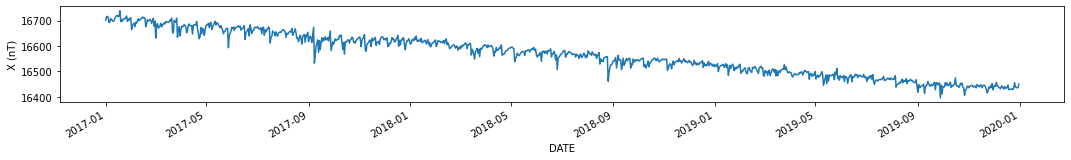

In [13]:
#visualizando
plt.figure(figsize=(18,9))

plt.subplot(4,1,1)
df.VSSX.plot()
plt.ylabel("X (nT)")

plt.show()

### Predict

In [14]:
x = df.index.values
y = df.F.values

In [15]:
#from sklearn.tree import DecisionTreeRegressor
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
train_size = int(len(x) * 9/10)
x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [17]:
model = SARIMAX(y_train, order=(1,2,1),seasonal_order=(1,1,1,5)) #apenas um exemplo. ainda não escolhi os melhores parametros
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  972
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 5)   Log Likelihood               -3606.500
Date:                           Sat, 19 Dec 2020   AIC                           7223.000
Time:                                   12:52:28   BIC                           7247.360
Sample:                                        0   HQIC                          7232.274
                                           - 972                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3833      0.026    -14.754      0.000      -0.434      -0.332
ma.L1         -0.9994      0.290     -3.445

In [18]:
start = len(x_train)
end = start+len(x_test)-1
y_predict = model_fit.predict(start=start,end=end,dynamics=True)

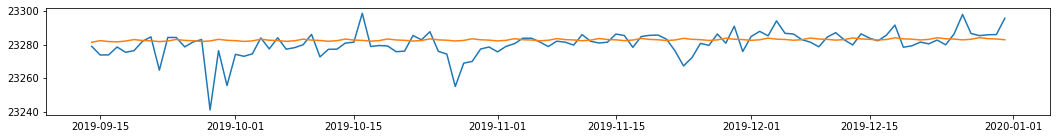

In [19]:
plt.figure(figsize=(18,9))
plt.subplot(4,1,1)

plt.plot(x_test,y_test)
plt.plot(x_test,y_predict)

plt.show()

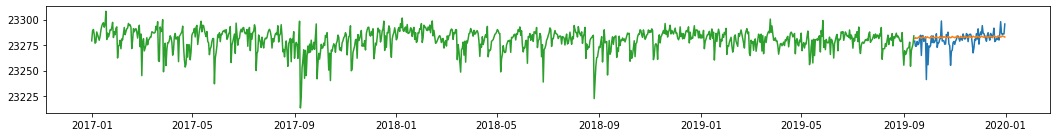

In [20]:
plt.figure(figsize=(18,9))
plt.subplot(4,1,1)

plt.plot(x_test,y_test)
plt.plot(x_test,y_predict)
plt.plot(x_train,y_train)

plt.show()